# Input data and DeClone statistics

This notebook documents the details about the input data (number of genes and events) as well as those of the output from DeClone (weights of different sets of adjacencies).

The input has been obtained through ZOMBI simulations and is located in the "../sim" folder. It contains of two sets of simulations (without_LT - no gene loss and HGT) and (with_L - with gene loss). Each simulated Run consists of the species tree (folder T), genomes as gene sequences and gene family trees with related information (both in folder G).

The DeClone output is stored in "../sim/MODE/Run_XX/DeClone_KT" folder where MODE is either without_LT or with_L, XX is the run number and KT is the temperature chosen while running DeClone. 

In [1]:
from IPython.display import Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
from ete3 import Tree, faces, AttrFace, TreeStyle
plt.switch_backend('agg')
plt.rcParams['axes.grid'] = True
%matplotlib inline

In [2]:
#Data obtained through ZOMBI simulations
#Read input file
def read_file(filename):
    string = open(filename, "r").read()
    string_list = string.split("\n")
    string_list = [line for line in string_list if line and line[0] != '#'] #Read line only if it is nonempty and not a comment.
    return string_list

#Obtaining ancestral and extant species
def classify_species(tree_file):
    ancestral = []
    extant = []
    rev_tree_dict = {}
    
    string = open(tree_file, "r").read()
    string_list = string.split("\n")
    string_list = [line for line in string_list if line and line[0] != '#'] 
    
    for line in string_list:
        line = line.split("\t")
        if line[1] == "S":
            species = line[2].split(";")[0]
            ancestral.append(species)
            
            ch1, ch2 = line[2].split(";")[1], line[2].split(";")[2]
            rev_tree_dict[ch1] = species
            rev_tree_dict[ch2] = species
        elif line[1] == "F":
            species = line[2]
            extant.append(species)
    return ancestral,extant, rev_tree_dict

#Layout adding node names for internal nodes
def my_layout(node):
    if node.is_leaf():
         # If terminal node, draws its name
        name_face = AttrFace("name")
    else:
         # If internal node, draws label with smaller font size
        name_face = AttrFace("name", fsize=10)
    # Adds the name face to the image at the preferred position
    faces.add_face_to_node(name_face, node, column=0, position="branch-right")
    #faces.add_face_to_node(AttrFace("name"), node, column=0)

## Mode: without gene loss or HGT

Here we look at the distribution of genes across all the species in the tree as well as the number of different types of events across every branch when no gene loss has been allowed in the simulations. 

### Tree
The species tree has been provided with node details (position and distance from Root). 

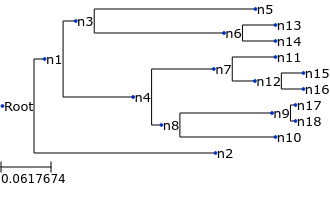

In [3]:
tree_file = "../sim/without_LT/Run_0/T/Events.tsv"
extant_tree = "../sim/without_LT/Run_0/T/ExtantTree.nwk"
ancestral_no_loss, extant_no_loss, rev_tree_dict_no_loss = classify_species(tree_file)
overall = ancestral_no_loss + extant_no_loss

ts = TreeStyle()
# Do not add leaf names automatically
ts.show_leaf_name = False
# Use my custom layout
ts.layout_fn = my_layout
#t = Tree(extant_tree, format=3)
t = read_file(extant_tree)[0][:-1]+"Root;"
t=Tree(t,format=1)
# Tell ETE to use your custom Tree Style
t.render("%%inline",tree_style=ts)

In [4]:
print("Node\tPosition\tDistance from Root\n")
dist_from_Root = {}
for node in overall:
    species = node
    count = 0
    while species != "Root":
        species = rev_tree_dict_no_loss[species]
        count += 1
    dist_from_Root[node] = count
for species in dist_from_Root:
    if species in ancestral_no_loss:
        print(species, "\t", "Ancestral", "\t", dist_from_Root[species])
    else:
        print(species, "\t", "Extant", "\t", dist_from_Root[species])
    

Node	Position	Distance from Root

Root 	 Ancestral 	 0
n1 	 Ancestral 	 1
n3 	 Ancestral 	 2
n4 	 Ancestral 	 2
n8 	 Ancestral 	 3
n7 	 Ancestral 	 3
n6 	 Ancestral 	 3
n12 	 Ancestral 	 4
n9 	 Ancestral 	 4
n2 	 Extant 	 1
n10 	 Extant 	 4
n14 	 Extant 	 4
n16 	 Extant 	 5
n11 	 Extant 	 4
n5 	 Extant 	 3
n17 	 Extant 	 5
n13 	 Extant 	 4
n15 	 Extant 	 5
n18 	 Extant 	 5


In [5]:
col_names = ["Run"]+overall
gene_count_no_loss = pd.DataFrame(columns = col_names)
#print(gene_count)
for i in range(1,21):
    genome_folder = "../sim/without_LT/Run_"+str(i)+"/G/Genomes/"
    sp_dict = {}
    for filename in os.listdir(genome_folder):
        species = filename.split("_")[0]
        num_lines = sum(1 for line in open(genome_folder+filename))-1
        if species != "Origin":
            sp_dict[species] = num_lines
 
    gene_count_no_loss = gene_count_no_loss.append({"Run":'Run_'+str(i), overall[0]:sp_dict[overall[0]], overall[1]:sp_dict[overall[1]], overall[2]:sp_dict[overall[2]],\
                      overall[3]:sp_dict[overall[3]], overall[4]:sp_dict[overall[4]], overall[5]:sp_dict[overall[5]], overall[6]:sp_dict[overall[6]],\
                      overall[7]:sp_dict[overall[7]], overall[8]:sp_dict[overall[8]], overall[9]:sp_dict[overall[9]], overall[10]:sp_dict[overall[10]],\
                      overall[11]:sp_dict[overall[11]], overall[12]:sp_dict[overall[12]], overall[13]:sp_dict[overall[13]], overall[14]:sp_dict[overall[14]],\
                      overall[15]:sp_dict[overall[15]], overall[16]:sp_dict[overall[16]], overall[17]:sp_dict[overall[17]], overall[18]:sp_dict[overall[18]]}, ignore_index=True)
       
        
        

### Gene distribution

The number of genes in genomes n1, n3 and n4 almost consistently have less than 10 genes more than the Root. On the other hand, the leaf nodes which have had significantly more time to evolve have, on an average, close to 50 genes more than the Root. Considering that the ZOMBI simulations had 200 duplication events to begin with, it would need 2 to 3 genes per duplicated segment to achieve the number of the genes in the extant genomes. However, the parameter for length of duplicated segment in ZOMBI dictates that an average of 1.25 genes should be seen per duplication event. A possible explanation for this is that majority of the duplication events took place in earlier branches of the tree, propagating a higher number of genes down to the leaves.

It would also be worthwhile to test some more instances with varying parameter values in order to confirm that ZOMBI is  providing genomes as expected from the parameter values. However, that does not seem necessary considering the number of events data (shown below).

Note that the parameters can be found at "../sim/MODE/Run_XX/G/Genome_parameters.tsv".

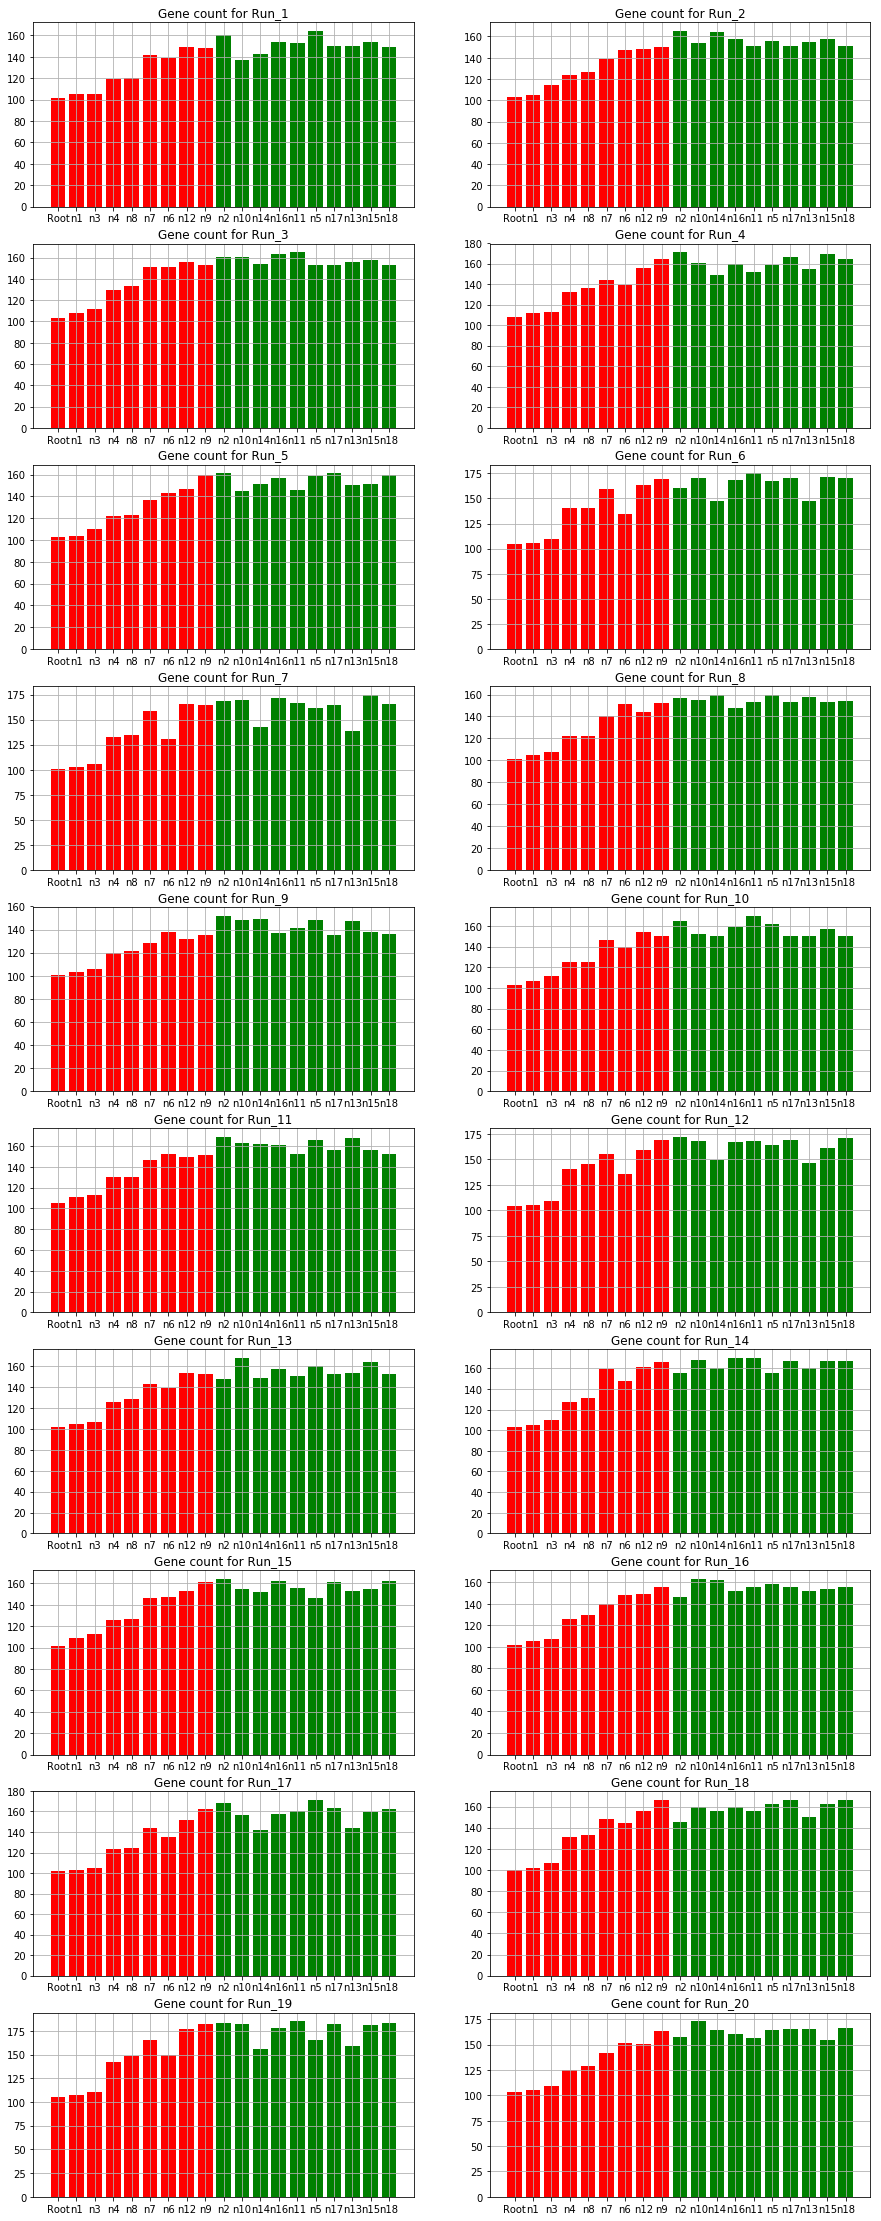

In [6]:

figure, axes = plt.subplots(nrows=10, ncols=2, figsize=(15,40))
clr = []
for i in range(0,19):
    if i < 9:
        clr.append('red')
    else:
        clr.append('green')

for i in range(1,21):
    k = (i-1)//2
    l = (i-1)%2
    
    axes[k,l].bar(list(range(1,20)), gene_count_no_loss.iloc[[i-1]].values.flatten().tolist()[1:], color=clr)
    axes[k,l].set_xticks(list(range(1,20)))
    axes[k,l].set_xticklabels(overall)
    axes[k,l].title.set_text('Gene count for Run_'+str(i))
    
plt.show()
plt.close()

In [7]:
gene_count_no_loss

,Run,Root,n1,n3,n4,n8,n7,n6,n12,n9,n2,n10,n14,n16,n11,n5,n17,n13,n15,n18
0,Run_1,102,105,105,119,120,142,139,149,148,160,137,143,154,153,164,150,150,154,149
1,Run_2,103,105,114,124,127,139,147,148,150,165,154,164,158,151,156,151,155,158,151
2,Run_3,103,108,112,130,133,151,151,156,153,161,161,154,163,165,153,153,156,158,153
3,Run_4,108,112,113,132,136,144,139,156,164,171,161,149,160,152,159,166,155,169,164
4,Run_5,103,104,110,122,123,137,143,147,160,161,145,151,157,146,159,161,150,151,160
5,Run_6,105,106,110,141,141,159,135,163,169,160,170,148,168,175,167,170,148,171,170
6,Run_7,101,103,106,133,135,159,131,166,165,169,170,143,172,167,162,165,139,175,166
7,Run_8,101,105,108,122,122,140,151,144,152,157,155,160,148,153,160,153,158,153,154
8,Run_9,101,103,106,120,121,128,138,132,135,152,148,149,137,141,148,135,147,138,136
9,Run_10,103,107,112,125,125,146,140,154,150,165,152,150,159,170,162,150,150,157,150


In [8]:
event_counts_no_loss = {}
for i in range(1,21):
    event_counts_no_loss['Run_'+str(i)] = pd.DataFrame(columns=["Branch", "Duplication", "Loss", "Inversion", "Translocation" ])
    gene_fam_folder = "../sim/without_LT/Run_"+str(i)+"/G/Gene_families/"
    
    branch_dict = {} #Key = branches, Value = (D,L,list of inv timestamps, list of transl timestamps)
    
    for filename in os.listdir(gene_fam_folder):
        string = open(gene_fam_folder+filename, "r").read()
        string_list = string.split("\n")
        string_list = [line for line in string_list if line and line[0] != '#'] #Read line only if it is nonempty and not a comment.
        
        for line in string_list:
            line = line.split("\t")
            if line[1] == "D":
                ch = line[2].split(";")[0]
                if ch != "Root":
                    par = rev_tree_dict_no_loss[ch]
                    branch = (par,ch)
                    if branch not in branch_dict:
                        branch_dict[branch] = [0,0,set(),set()]
                    branch_dict[branch][0]+=1 
            elif line[1] == "L":
                ch = line[2].split(";")[0]
                if ch != "Root":
                    par = rev_tree_dict_no_loss[ch]
                    branch = (par,ch)
                    if branch not in branch_dict:
                        branch_dict[branch] = [0,0,set(),set()]
                    branch_dict[branch][1]+=1 
            elif line[1] == "I":
                ch = line[2].split(";")[0]
                if ch != "Root":
                    par = rev_tree_dict_no_loss[ch]
                    branch = (par,ch)
                    if branch not in branch_dict:
                        branch_dict[branch] = [0,0,set(),set()]
                    branch_dict[branch][2].add(line[0])
            elif line[1] == "C":
                ch = line[2].split(";")[0]
                if ch != "Root":
                    par = rev_tree_dict_no_loss[ch]
                    branch = (par,ch)
                    if branch not in branch_dict:
                        branch_dict[branch] = [0,0,set(),set()]
                    branch_dict[branch][3].add(line[0])                
    
    for branch in branch_dict:
        event_counts_no_loss['Run_'+str(i)] = event_counts_no_loss['Run_'+str(i)].append({"Branch":branch, "Duplication":branch_dict[branch][0],\
                                                                          "Loss":branch_dict[branch][1], "Inversion":len(branch_dict[branch][2]),\
                                                                          "Translocation":len(branch_dict[branch][3])},ignore_index=True) 
   

### Event counts per branch

In the graphs below, we can see the number of duplication events. As expected the longer branches such as (Root, n2), (n3, n5) and (n3, n6) consistently show a higher number of events as compared to the other branches. There is no indication of higher branches having more events that lead to heavily scrambled genomes. However, considering the high number of genes observed in the extant genomes, it would be worth checking if a similar trend is observed here. Note that the number of duplications consistently adds up to almost 250 (200 duplication events x 1.25 duplications per event), which backs the ZOMBI simulator.  

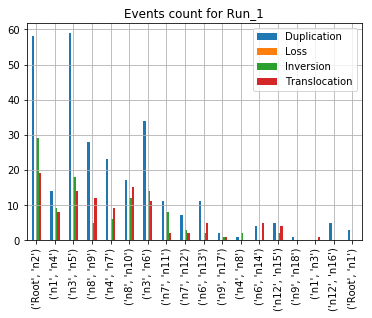

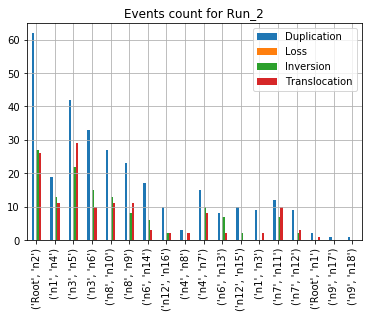

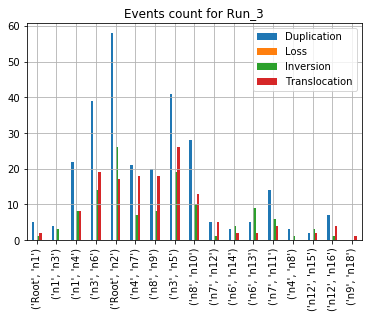

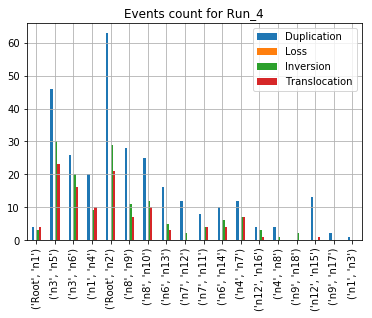

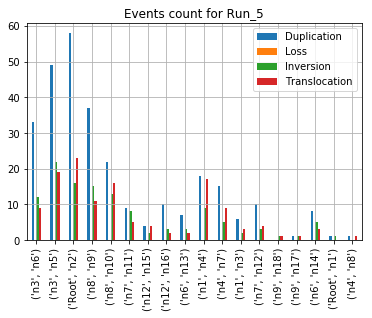

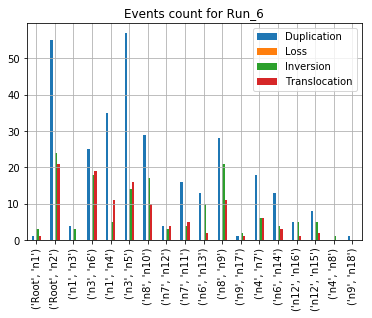

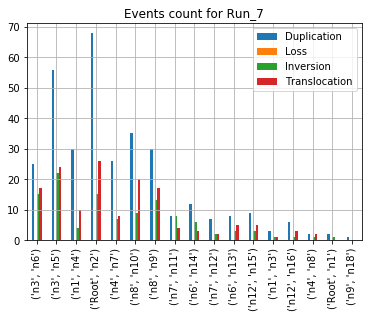

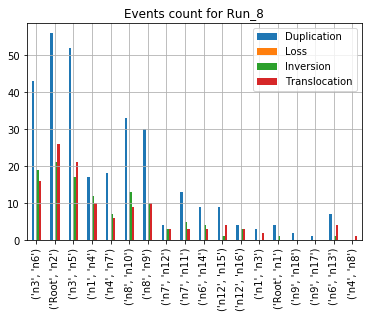

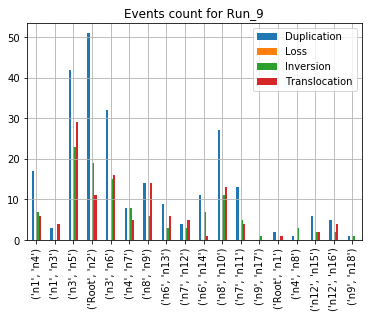

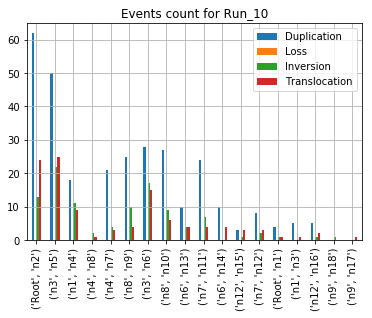

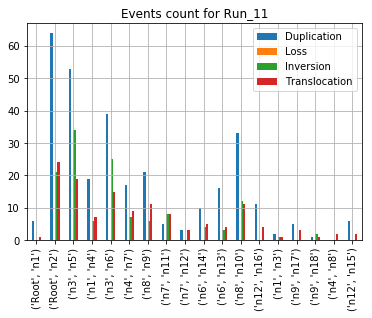

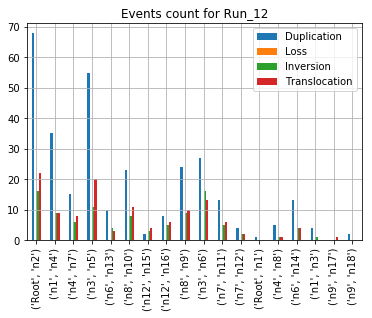

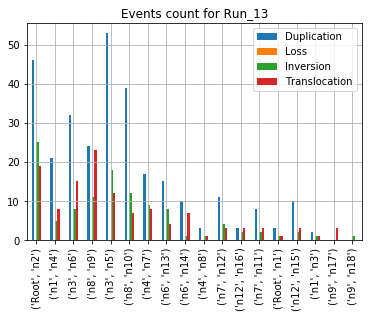

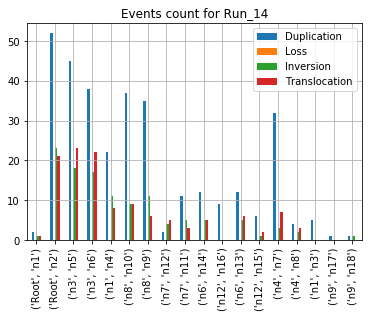

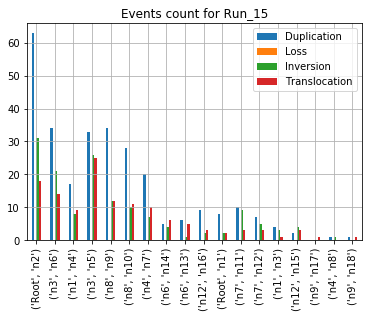

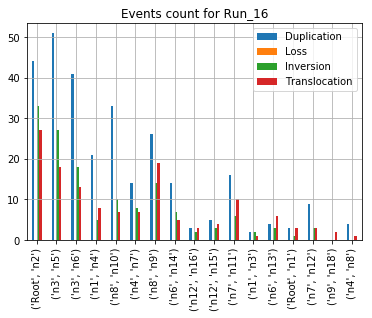

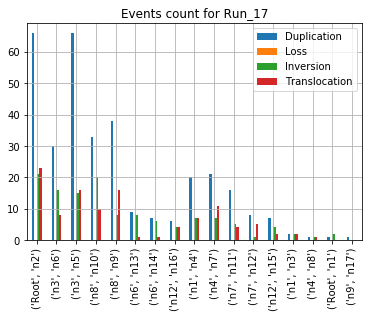

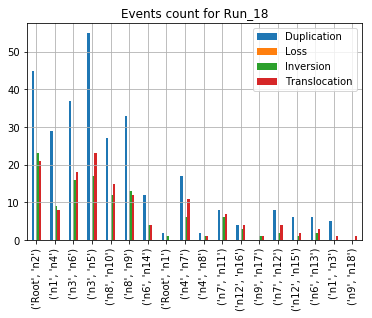

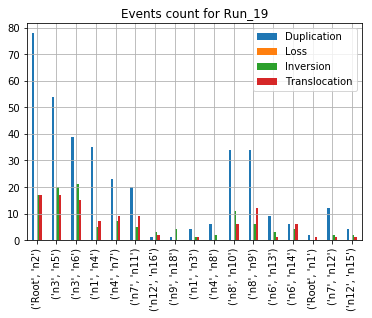

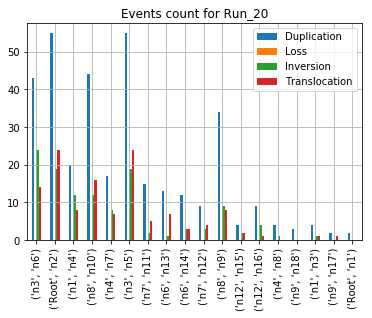

In [9]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(15,40))


for i in range(1,21):
    k = (i-1)//2
    l = (i-1)%2
    
    axs[k,l] = event_counts_no_loss['Run_'+str(i)][["Duplication","Loss","Inversion","Translocation"]].plot(kind='bar')
    axs[k,l].set_xticks(event_counts_no_loss['Run_'+str(i)].index)
    axs[k,l].set_xticklabels(event_counts_no_loss['Run_'+str(i)].Branch, rotation=90)
    #plt.savefig('test_'+str(i))
    axs[k,l].title.set_text('Events count for Run_'+str(i))
    
    fig.clear()
    plt.close(fig)


## Mode: With gene loss

Here we look at the distribution of genes across all the species in the tree as well as the number of different types of events across every branch with gene loss allowed in the simulations.

### Tree

The species tree has been provided with node details (position and distance from Root). It is different from the tree for the without_LT simulations.

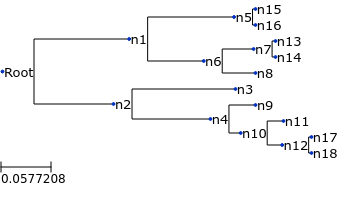

In [10]:
tree_file = "../sim/with_L/Run_0/T/Events.tsv"
extant_tree = "../sim/with_L/Run_0/T/ExtantTree.nwk"
ancestral_with_loss, extant_with_loss , rev_tree_dict_with_loss = classify_species(tree_file)
overall = ancestral_with_loss + extant_with_loss

ts = TreeStyle()
# Do not add leaf names automatically
ts.show_leaf_name = False
# Use my custom layout
ts.layout_fn = my_layout
#t = Tree(extant_tree, format=3)
t = read_file(extant_tree)[0][:-1]+"Root;"
t=Tree(t,format=1)
# Tell ETE to use your custom Tree Style
t.render("%%inline",tree_style=ts)

In [11]:
print("Node\tPosition\tDistance from Root\n")
dist_from_Root = {}
for node in overall:
    species = node
    count = 0
    while species != "Root":
        species = rev_tree_dict_with_loss[species]
        count += 1
    dist_from_Root[node] = count
for species in dist_from_Root:
    if species in ancestral_no_loss:
        print(species, "\t", "Ancestral", "\t", dist_from_Root[species])
    else:
        print(species, "\t", "Extant", "\t", dist_from_Root[species])

Node	Position	Distance from Root

Root 	 Ancestral 	 0
n2 	 Extant 	 1
n1 	 Ancestral 	 1
n6 	 Ancestral 	 2
n4 	 Ancestral 	 2
n10 	 Extant 	 3
n7 	 Ancestral 	 3
n5 	 Extant 	 2
n12 	 Ancestral 	 4
n16 	 Extant 	 3
n13 	 Extant 	 4
n11 	 Extant 	 4
n15 	 Extant 	 3
n8 	 Ancestral 	 3
n9 	 Ancestral 	 3
n17 	 Extant 	 5
n14 	 Extant 	 4
n18 	 Extant 	 5
n3 	 Ancestral 	 2



### Gene distribution

In this case, it is difficult to detect an obvious trend along the tree as the duplications and gene losses counteract eachother, allowing for a non-monotonous gene count along any path of the species tree. Further, the expected number of losses (200) is not very small as compared to the expected number of duplicate genes. A lower gene count in the extant genomes is indicative of gene losses later along the timeline.  

Again, the parameters can be found at "../sim/MODE/Run_XX/G/Genome_parameters.tsv" replacing the variables appropriately.

In [12]:
col_names = ["Run"]+overall
gene_count_with_loss = pd.DataFrame(columns = col_names)
#print(gene_count)
for i in range(1,21):
    genome_folder = "../sim/with_L/Run_"+str(i)+"/G/Genomes/"
    sp_dict = {}
    for filename in os.listdir(genome_folder):
        species = filename.split("_")[0]
        num_lines = sum(1 for line in open(genome_folder+filename))-1
        if species != "Origin":
            sp_dict[species] = num_lines
 
    gene_count_with_loss = gene_count_with_loss.append({"Run":'Run_'+str(i), overall[0]:sp_dict[overall[0]], overall[1]:sp_dict[overall[1]], overall[2]:sp_dict[overall[2]],\
                      overall[3]:sp_dict[overall[3]], overall[4]:sp_dict[overall[4]], overall[5]:sp_dict[overall[5]], overall[6]:sp_dict[overall[6]],\
                      overall[7]:sp_dict[overall[7]], overall[8]:sp_dict[overall[8]], overall[9]:sp_dict[overall[9]], overall[10]:sp_dict[overall[10]],\
                      overall[11]:sp_dict[overall[11]], overall[12]:sp_dict[overall[12]], overall[13]:sp_dict[overall[13]], overall[14]:sp_dict[overall[14]],\
                      overall[15]:sp_dict[overall[15]], overall[16]:sp_dict[overall[16]], overall[17]:sp_dict[overall[17]], overall[18]:sp_dict[overall[18]]}, ignore_index=True)
       
        

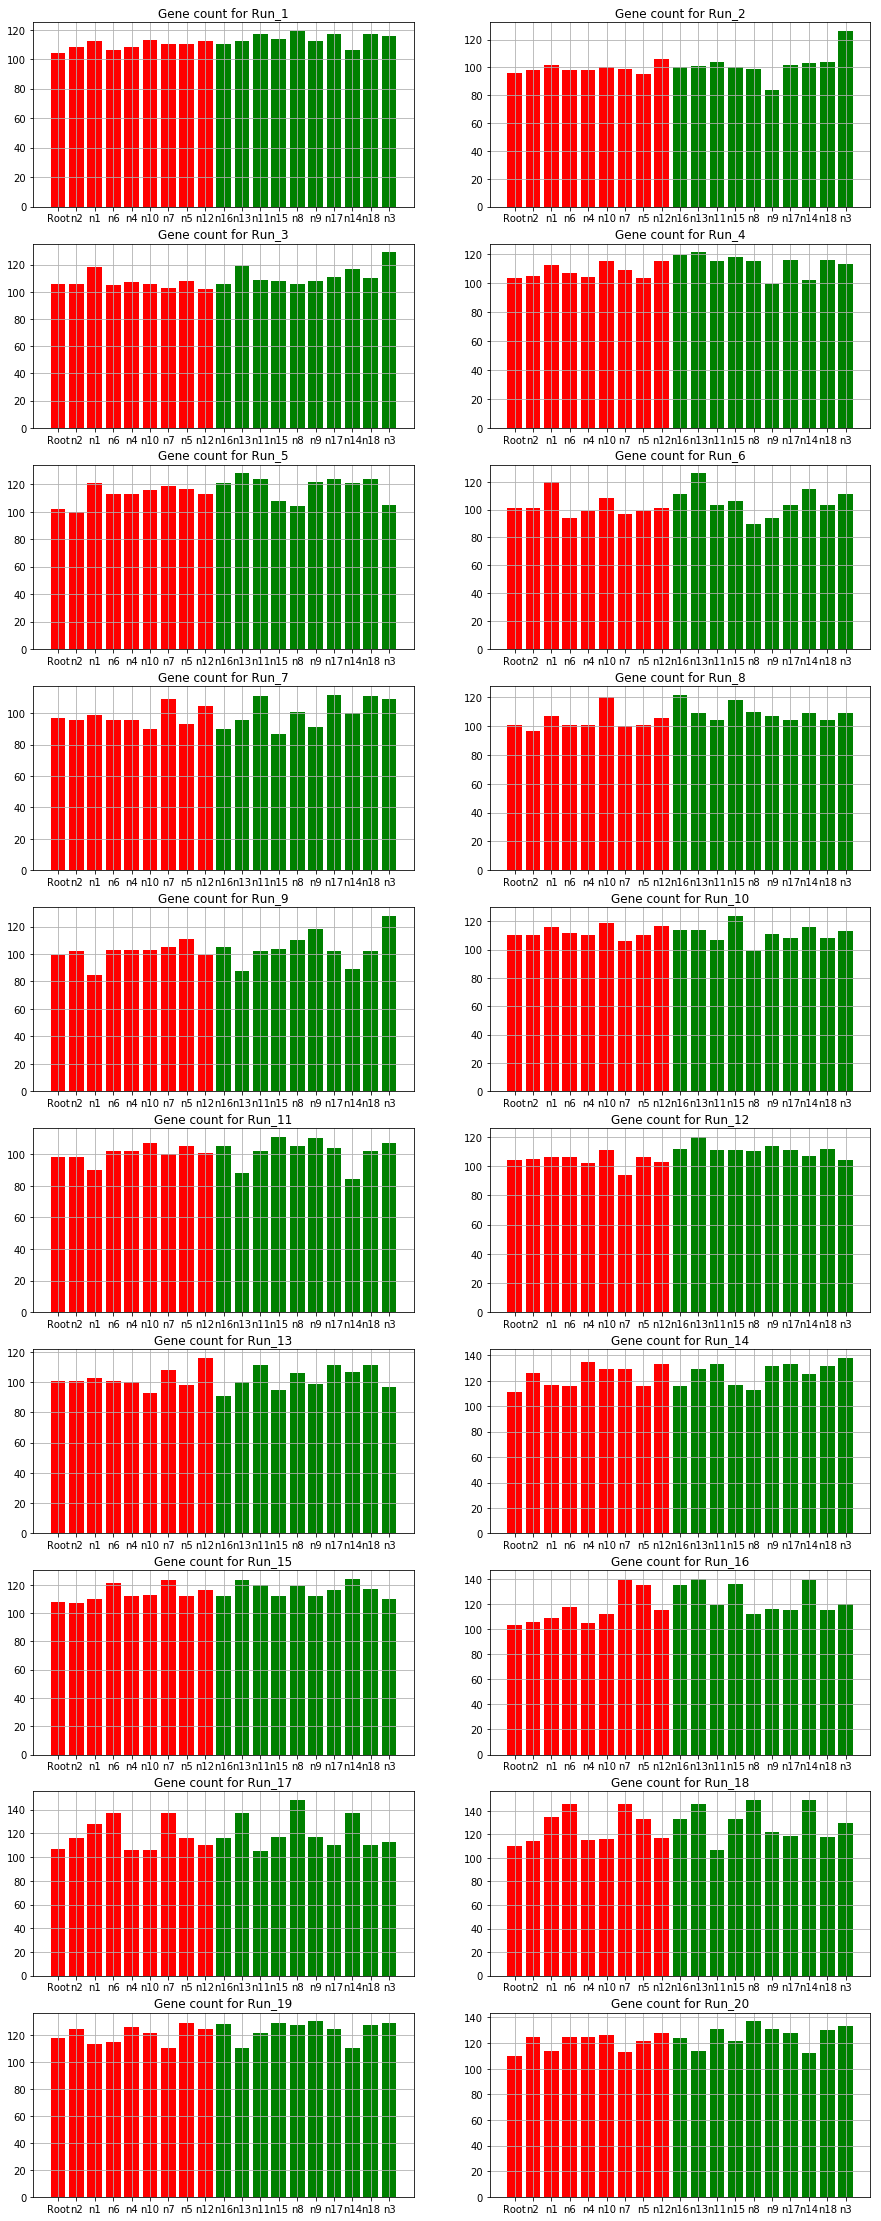

In [13]:

figure, axes = plt.subplots(nrows=10, ncols=2, figsize=(15,40))
clr = []
for i in range(0,19):
    if i < 9:
        clr.append('red')
    else:
        clr.append('green')

for i in range(1,21):
    k = (i-1)//2
    l = (i-1)%2
    
    axes[k,l].bar(list(range(1,20)), gene_count_with_loss.iloc[[i-1]].values.flatten().tolist()[1:], color=clr)
    axes[k,l].set_xticks(list(range(1,20)))
    axes[k,l].set_xticklabels(overall)
    axes[k,l].title.set_text('Gene count for Run_'+str(i))
    
plt.show()
plt.close()

In [14]:
gene_count_with_loss

,Run,Root,n2,n1,n6,n4,n10,n7,n5,n12,n16,n13,n11,n15,n8,n9,n17,n14,n18,n3
0,Run_1,104,108,112,106,108,113,110,110,112,110,112,117,114,119,112,117,106,117,116
1,Run_2,96,98,102,98,98,100,99,95,106,100,101,104,100,99,84,102,103,104,126
2,Run_3,106,106,118,105,107,106,103,108,102,106,119,109,108,106,108,111,117,110,129
3,Run_4,103,105,112,107,104,115,109,103,115,119,121,115,118,115,99,116,102,116,113
4,Run_5,102,100,121,113,113,116,119,117,113,121,128,124,108,104,122,124,121,124,105
5,Run_6,101,101,120,94,99,108,97,99,101,111,126,103,106,90,94,103,115,103,111
6,Run_7,97,96,99,96,96,90,109,93,105,90,96,111,87,101,91,112,100,111,109
7,Run_8,101,97,107,101,101,120,100,101,106,122,109,104,118,110,107,104,109,104,109
8,Run_9,99,102,85,103,103,103,105,111,99,105,88,102,104,110,118,102,89,102,128
9,Run_10,110,110,116,112,110,119,106,110,117,114,114,107,124,99,111,108,116,108,113


### Number of events

Owing to the tree shape, the number of events does not show a distinct pattern. Hence, in some instances the number of events might be higher in some internal branches whereas others might shown higher activity in branches connected to the leaves. However, an important thing to notice is that in some cases the number of losses in a branch exceeds 25 - almost 20% of the genome size. This may result in poor reconstruction of the ancestors of this genome. It may be interesting to see if the performance varies with the distribution of losses across the branches or if the impact of gene losses on the distance changes significantly. 

Note: I am not entirely sure if the number of losses is more or less evenly spread across branches in reality. 

In [15]:
event_counts_with_loss = {}
for i in range(1,21):
    event_counts_with_loss['Run_'+str(i)] = pd.DataFrame(columns=["Branch", "Duplication", "Loss", "Inversion", "Translocation" ])
    gene_fam_folder = "../sim/with_L/Run_"+str(i)+"/G/Gene_families/"
    
    branch_dict = {} #Key = branches, Value = (D,L,list of inv timestamps, list of transl timestamps)
    
    for filename in os.listdir(gene_fam_folder):
        string = open(gene_fam_folder+filename, "r").read()
        string_list = string.split("\n")
        string_list = [line for line in string_list if line and line[0] != '#'] #Read line only if it is nonempty and not a comment.
        
        for line in string_list:
            line = line.split("\t")
            if line[1] == "D":
                ch = line[2].split(";")[0]
                if ch != "Root":
                    par = rev_tree_dict_with_loss[ch]
                    branch = (par,ch)
                    if branch not in branch_dict:
                        branch_dict[branch] = [0,0,set(),set()]
                    branch_dict[branch][0]+=1 
            elif line[1] == "L":
                ch = line[2].split(";")[0]
                if ch != "Root":
                    par = rev_tree_dict_with_loss[ch]
                    branch = (par,ch)
                    if branch not in branch_dict:
                        branch_dict[branch] = [0,0,set(),set()]
                    branch_dict[branch][1]+=1 
            elif line[1] == "I":
                ch = line[2].split(";")[0]
                if ch != "Root":
                    par = rev_tree_dict_with_loss[ch]
                    branch = (par,ch)
                    if branch not in branch_dict:
                        branch_dict[branch] = [0,0,set(),set()]
                    branch_dict[branch][2].add(line[0])
            elif line[1] == "C":
                ch = line[2].split(";")[0]
                if ch != "Root":
                    par = rev_tree_dict_with_loss[ch]
                    branch = (par,ch)
                    if branch not in branch_dict:
                        branch_dict[branch] = [0,0,set(),set()]
                    branch_dict[branch][3].add(line[0])                
    
    for branch in branch_dict:
        event_counts_with_loss['Run_'+str(i)] = event_counts_with_loss['Run_'+str(i)].append({"Branch":branch, "Duplication":branch_dict[branch][0],\
                                                                          "Loss":branch_dict[branch][1], "Inversion":len(branch_dict[branch][2]),\
                                                                          "Translocation":len(branch_dict[branch][3])},ignore_index=True) 
   

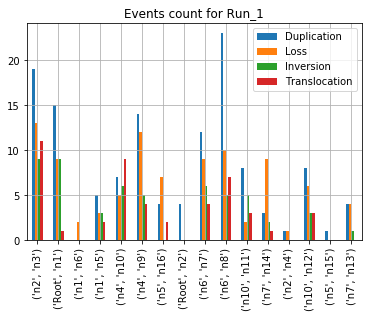

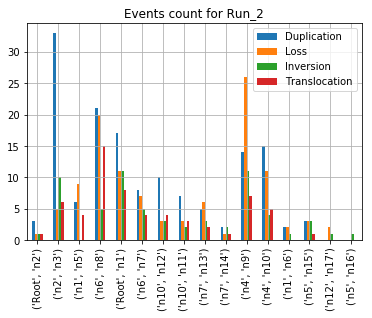

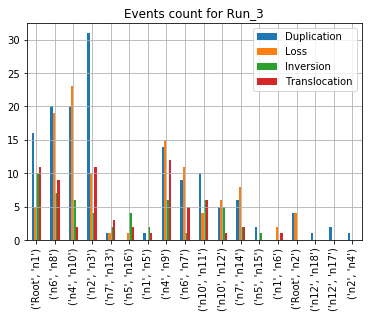

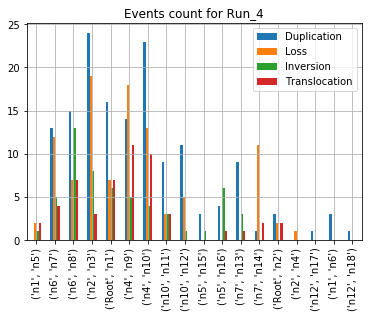

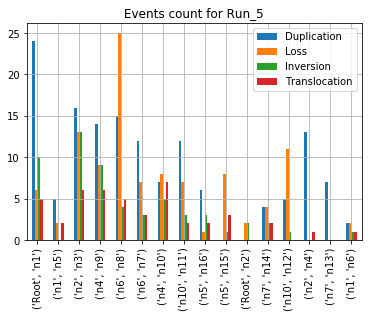

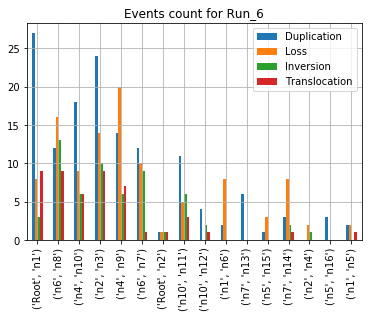

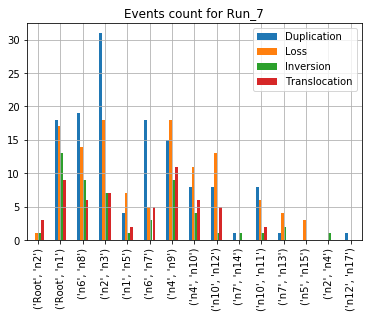

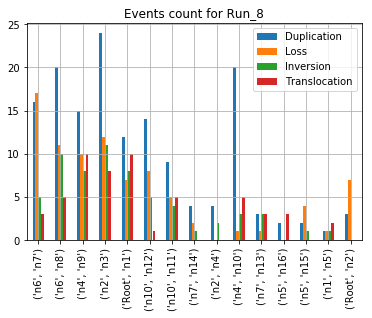

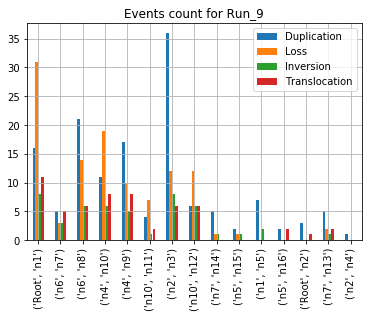

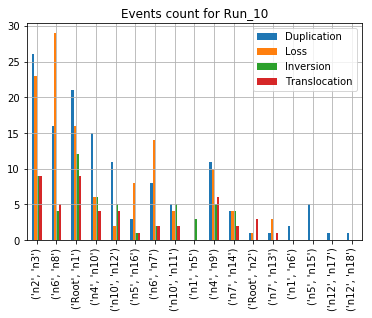

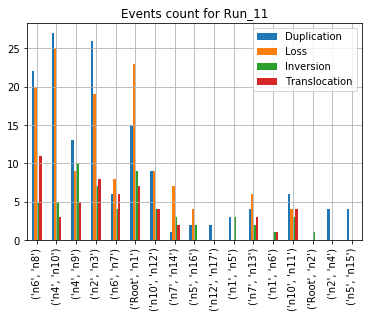

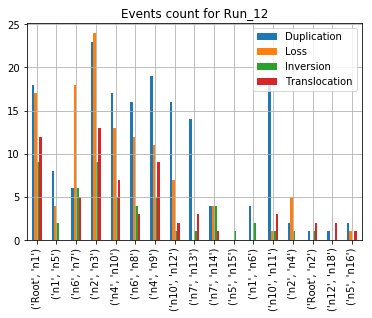

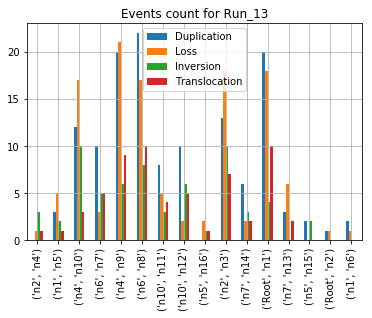

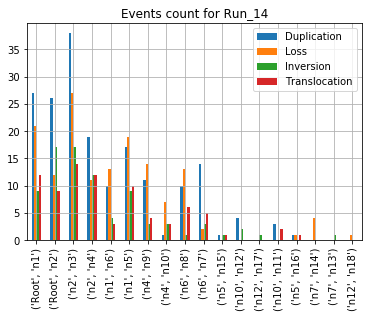

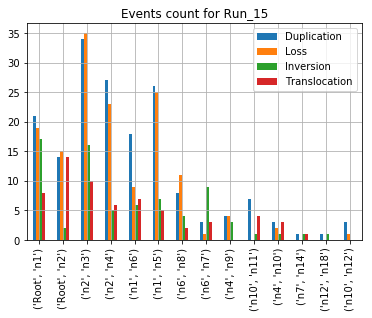

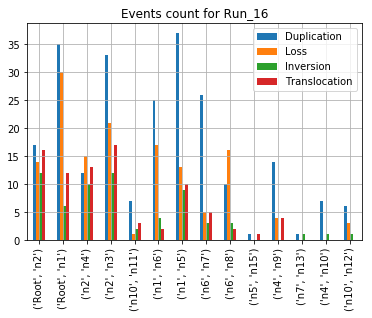

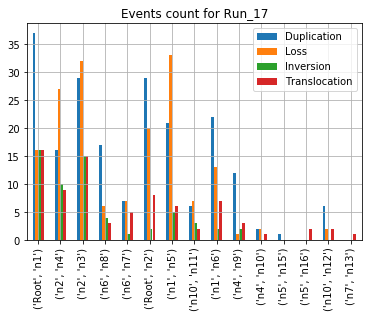

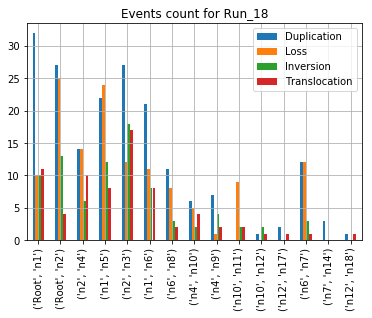

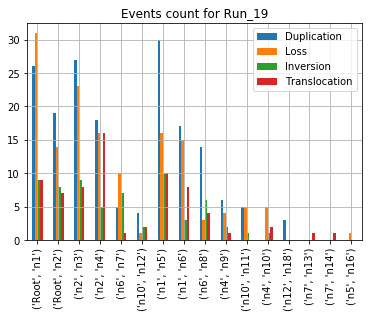

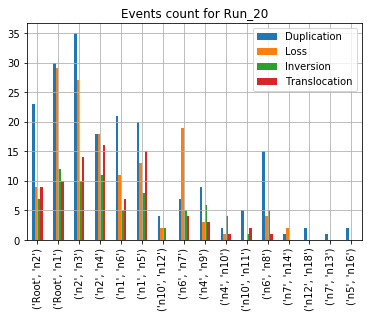

In [16]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(5,15))


for i in range(1,21):
    k = (i-1)//2
    l = (i-1)%2
    
    axs[k,l] = event_counts_with_loss['Run_'+str(i)][["Duplication","Loss","Inversion","Translocation"]].plot(kind='bar')
    axs[k,l].set_xticks(event_counts_with_loss['Run_'+str(i)].index)
    axs[k,l].set_xticklabels(event_counts_with_loss['Run_'+str(i)].Branch, rotation=90)
    #plt.savefig('test_'+str(i))
    axs[k,l].title.set_text('Events count for Run_'+str(i))
    
    fig.clear()
    plt.close(fig)

## DeClone weights

Here we compute the mean weight as well as the standard deviation for all adjacencies for a specific mode and temperature and mean weight of real adjacencies (from the ZOMBI genomes). We compute the weights for all ancestral nodes (9 in total) and display the results in tabular format.

In [17]:
#Function to compute mean weight of all adjacencies, mean weight of real adjacencies and standard deviation for the former.
def get_adj_details(mode,kT,ancestral,true_adj_dict):
    sample_avg = {}
    std_dev = {}
    real_avg = {}
    for i in range(1,21):
        sample_avg['Run_'+str(i)] = {}
        std_dev['Run_'+str(i)] = {}
        real_avg['Run_'+str(i)] = {}

        DeClone_adj_file = "../sim/"+mode+"/Run_"+str(i)+"/DeClone_"+str(kT)+"a/formatted_adjacencies"
        string = open(DeClone_adj_file, "r").read()
        string_list = string.split("\n")
        string_list = [line for line in string_list if line and line[0] != '#'] #Read line only if it is nonempty and not a comment.

        sample_wts, real_wts = {}, {}
        for species in ancestral:
            sample_wts[species] = []
            real_wts[species] = []

        for line in string_list:
            line = line.split(" ")
            species = line[0]
            left, lor = line[1], line[3]
            right, ror = line[2], line[4]
            wt = float(line[5])
            if lor == '+':
                lgene = (left, 'h')
            else:
                lgene = (left, 't')
            if ror == '+':
                rgene = (right, 't')
            else:
                rgene = (right, 'h')
            adj = (lgene,rgene)

            if species in ancestral:
                if adj in true_adj_dict['Run_'+str(i)][species] or adj[::-1] in true_adj_dict['Run_'+str(i)][species]:
                    real_wts[species].append(wt)
                sample_wts[species].append(wt)

        for species in ancestral:
            sample_avg['Run_'+str(i)][species] = sum(sample_wts[species])/len(sample_wts[species])
            std_dev['Run_'+str(i)][species] = statistics.stdev(sample_wts[species])
            real_avg['Run_'+str(i)][species] = sum(real_wts[species])/len(real_wts[species])        

    s_mean = pd.DataFrame(columns = ancestral)
    r_mean = pd.DataFrame(columns = ancestral)
    s_dev = pd.DataFrame(columns = ancestral)
    for i in range(1,21):

        s_mean = s_mean.append({ancestral[0]: sample_avg['Run_'+str(i)][ancestral[0]], ancestral[1]: sample_avg['Run_'+str(i)][ancestral[1]],\
                       ancestral[2]: sample_avg['Run_'+str(i)][ancestral[2]], ancestral[3]: sample_avg['Run_'+str(i)][ancestral[3]],\
                       ancestral[4]: sample_avg['Run_'+str(i)][ancestral[4]], ancestral[5]: sample_avg['Run_'+str(i)][ancestral[5]],\
                       ancestral[6]: sample_avg['Run_'+str(i)][ancestral[6]], ancestral[7]: sample_avg['Run_'+str(i)][ancestral[7]],\
                       ancestral[8]: sample_avg['Run_'+str(i)][ancestral[8]]}, ignore_index=True)

        r_mean = r_mean.append({ancestral[0]: real_avg['Run_'+str(i)][ancestral[0]], ancestral[1]: real_avg['Run_'+str(i)][ancestral[1]],\
                       ancestral[2]: real_avg['Run_'+str(i)][ancestral[2]], ancestral[3]: real_avg['Run_'+str(i)][ancestral[3]],\
                       ancestral[4]: real_avg['Run_'+str(i)][ancestral[4]], ancestral[5]: real_avg['Run_'+str(i)][ancestral[5]],\
                       ancestral[6]: real_avg['Run_'+str(i)][ancestral[6]], ancestral[7]: real_avg['Run_'+str(i)][ancestral[7]],\
                       ancestral[8]: real_avg['Run_'+str(i)][ancestral[8]]}, ignore_index=True)

        s_dev = s_dev.append({ancestral[0]: std_dev['Run_'+str(i)][ancestral[0]], ancestral[1]: std_dev['Run_'+str(i)][ancestral[1]],\
                       ancestral[2]: std_dev['Run_'+str(i)][ancestral[2]], ancestral[3]: std_dev['Run_'+str(i)][ancestral[3]],\
                       ancestral[4]: std_dev['Run_'+str(i)][ancestral[4]], ancestral[5]: std_dev['Run_'+str(i)][ancestral[5]],\
                       ancestral[6]: std_dev['Run_'+str(i)][ancestral[6]], ancestral[7]: std_dev['Run_'+str(i)][ancestral[7]],\
                       ancestral[8]: std_dev['Run_'+str(i)][ancestral[8]]}, ignore_index=True)    

    return s_mean, r_mean, s_dev

## Mode: without_LT, kT: 0.1

In [18]:
#3 vectors (sample mean, std dev, real mean) of 9 numbers (1 per each ancestral species)
true_adj_dict_no_loss = {}
for i in range(1,21):
    genome_folder = "../sim/without_LT/Run_"+str(i)+"/G/Genomes/"
    true_adj_dict_no_loss['Run_'+str(i)] = {}
    for filename in os.listdir(genome_folder):
        species = filename.split("_")[0]
        true_adj_dict_no_loss['Run_'+str(i)][species] = set()
        if filename != "Origin":
            string = open(genome_folder+filename, "r").read()
            string_list = string.split("\n")
            string_list = [line for line in string_list if line and line[0] != '#'] #Read line only if it is nonempty and not a comment.

            for gidx in range(1,len(string_list)-1):
                left = string_list[gidx].split("\t")
                right = string_list[gidx+1].split("\t")
                lfam, lor, lid = left[1], left[2], left[3]
                rfam, ror, rid = right[1], right[2], left[3]
                if lor == '+':
                    lgene = (species+'@'+lfam+'_'+lid, 'h')
                else:
                    lgene = (species+'@'+lfam+'_'+lid, 't')
                if ror == '+':
                    rgene = (species+'@'+rfam+'_'+rid, 't')
                else:
                    rgene = (species+'@'+rfam+'_'+rid, 'h')
                true_adj_dict_no_loss['Run_'+str(i)][species].add((lgene,rgene))
                

In [19]:
s_mean_no_L_01, r_mean_no_L_01, s_dev_no_L_01 = get_adj_details('without_LT',0.1,ancestral_no_loss,true_adj_dict_no_loss)

#### Mean adjacency weights: Mode: without_LT, kT: 0.1

In [20]:
s_mean_no_L_01

,Root,n1,n3,n4,n8,n7,n6,n12,n9
0,0.566475,0.713864,0.790196,0.703023,0.912308,0.834062,0.830469,0.947961,0.734824
1,0.554762,0.808636,0.757692,0.860000,0.899091,0.928000,0.816863,0.963361,0.918642
2,0.462385,0.658400,0.788571,0.696857,0.820000,0.918676,0.799960,0.974839,0.854459
3,0.464907,0.469048,0.497000,0.740222,0.881628,0.877980,0.839551,0.932162,0.856235
4,0.539297,0.764516,0.798500,0.956591,0.956897,0.879778,0.886055,0.921310,0.899262
5,0.535652,0.583333,0.695246,0.738953,0.945750,0.938750,0.744539,0.939333,0.893663
6,0.532792,0.624054,0.709767,0.773478,0.906250,0.898016,0.801534,0.944388,0.853049
7,0.513819,0.573810,0.788163,0.856346,0.905676,0.938632,0.797652,0.945870,0.874059
8,0.560891,0.683636,0.850000,0.875161,0.953478,0.948636,0.858352,0.972500,0.956231
9,0.509750,0.719583,0.729318,0.796765,0.840345,0.841616,0.841519,0.945000,0.849365


#### Mean real adjacency weights: Mode: without_LT, kT: 0.1

In [21]:
r_mean_no_L_01

,Root,n1,n3,n4,n8,n7,n6,n12,n9
0,0.899524,0.836786,0.867222,0.925833,0.986667,0.922941,0.903143,0.957778,0.998750
1,0.844062,0.908000,0.853846,0.897826,0.909474,0.906190,0.986000,0.977692,0.966316
2,0.833333,0.948182,0.943125,0.801250,0.814286,0.833636,0.967500,0.911667,0.934000
3,0.653200,0.674286,0.656000,0.772857,0.858750,0.894000,0.887600,0.996000,0.994444
4,0.844000,0.809231,0.837692,0.924444,1.000000,0.937187,0.965128,0.964167,0.974444
5,0.771818,0.789474,0.791304,0.835556,0.995556,0.980000,0.894118,0.990000,0.996364
6,0.811373,0.716250,0.794783,0.871176,0.955000,0.988667,0.886207,1.000000,0.998571
7,0.847692,0.872778,0.933704,0.870500,0.948000,0.998889,0.965385,0.980000,0.980000
8,0.775333,0.820000,0.870000,0.860000,1.000000,0.981765,0.988108,0.976154,0.987059
9,0.815200,0.871429,0.916000,0.888333,0.803000,0.960000,0.948462,1.000000,0.764167


#### Standard deviation: Mode: without_LT, kT: 0.1

In [22]:
s_dev_no_L_01

,Root,n1,n3,n4,n8,n7,n6,n12,n9
0,0.325787,0.372766,0.319628,0.380692,0.224309,0.259462,0.248270,0.132379,0.345307
1,0.291629,0.309443,0.337814,0.262485,0.253412,0.182854,0.265031,0.127101,0.206934
2,0.295976,0.344887,0.302823,0.371656,0.292902,0.203183,0.293041,0.112658,0.257015
3,0.263110,0.337667,0.345705,0.308364,0.296423,0.233679,0.279786,0.201456,0.270092
4,0.319296,0.288142,0.293017,0.142191,0.188397,0.224478,0.245009,0.176223,0.214879
5,0.290140,0.418432,0.372118,0.378300,0.191068,0.190175,0.343371,0.197384,0.247438
6,0.300960,0.371105,0.345119,0.337438,0.255591,0.198067,0.308538,0.151536,0.269624
7,0.302482,0.385518,0.329290,0.247276,0.249472,0.149037,0.283756,0.163634,0.218909
8,0.306911,0.348845,0.277695,0.271734,0.206345,0.165593,0.239842,0.089794,0.108258
9,0.280049,0.314981,0.331385,0.328502,0.292483,0.235306,0.252335,0.182935,0.261200


## Mode: with_L, kT: 1

In [23]:
#3 vectors (sample mean, std dev, real mean) of 9 numbers (1 per each ancestral species)
true_adj_dict_with_loss = {}
for i in range(1,21):
    genome_folder = "../sim/with_L/Run_"+str(i)+"/G/Genomes/"
    true_adj_dict_with_loss['Run_'+str(i)] = {}
    for filename in os.listdir(genome_folder):
        species = filename.split("_")[0]
        true_adj_dict_with_loss['Run_'+str(i)][species] = set()
        if filename != "Origin":
            string = open(genome_folder+filename, "r").read()
            string_list = string.split("\n")
            string_list = [line for line in string_list if line and line[0] != '#'] #Read line only if it is nonempty and not a comment.

            for gidx in range(1,len(string_list)-1):
                left = string_list[gidx].split("\t")
                right = string_list[gidx+1].split("\t")
                lfam, lor, lid = left[1], left[2], left[3]
                rfam, ror, rid = right[1], right[2], left[3]
                if lor == '+':
                    lgene = (species+'@'+lfam+'_'+lid, 'h')
                else:
                    lgene = (species+'@'+lfam+'_'+lid, 't')
                if ror == '+':
                    rgene = (species+'@'+rfam+'_'+rid, 't')
                else:
                    rgene = (species+'@'+rfam+'_'+rid, 'h')
                true_adj_dict_with_loss['Run_'+str(i)][species].add((lgene,rgene)) 
                

In [24]:
s_mean_with_L_1, r_mean_with_L_1, s_dev_with_L_1 = get_adj_details('with_L',1,ancestral_with_loss,true_adj_dict_with_loss)

#### Mean adjacencies weights: Mode: with_L, kT: 1 

In [25]:
s_mean_with_L_1

,Root,n2,n1,n6,n4,n10,n7,n5,n12
0,0.530986,0.420317,0.371321,0.407794,0.448105,0.338327,0.423913,0.414915,0.621263
1,0.550000,0.517130,0.378075,0.415437,0.467938,0.417366,0.395886,0.466196,0.521771
2,0.596349,0.489848,0.408435,0.442411,0.493826,0.415844,0.461277,0.450160,0.785957
3,0.572482,0.487698,0.375093,0.416433,0.470438,0.381523,0.395037,0.407705,0.640636
4,0.576476,0.444731,0.386500,0.396170,0.481452,0.283613,0.445608,0.365857,0.756071
5,0.642197,0.526789,0.420021,0.433077,0.496897,0.363354,0.447612,0.454453,0.786481
6,0.531650,0.509767,0.362412,0.478889,0.487292,0.356826,0.446496,0.383304,0.722192
7,0.545333,0.479512,0.389510,0.412749,0.498729,0.362776,0.438441,0.438211,0.492297
8,0.537073,0.471947,0.380962,0.388943,0.457324,0.316808,0.376766,0.421513,0.618704
9,0.559062,0.453534,0.399116,0.438875,0.470800,0.393507,0.417339,0.439643,0.586884


#### Mean real adjacency weights: Mode: with_L, kT: 1

In [26]:
r_mean_with_L_1

,Root,n2,n1,n6,n4,n10,n7,n5,n12
0,0.804000,0.737037,0.571212,0.738519,0.766429,0.410800,0.673077,0.713571,1.000000
1,0.753125,0.683750,0.455909,0.845000,0.784667,0.336000,0.737000,0.655714,1.000000
2,0.791154,0.596667,0.530455,0.622632,0.587200,0.460571,0.641786,0.580000,1.000000
3,0.793448,0.740952,0.586207,0.759286,0.778929,0.601000,0.703548,0.651429,1.000000
4,0.811333,0.655172,0.653158,0.712727,0.720667,0.205000,0.726786,0.485172,1.000000
5,0.859310,0.784400,0.659143,0.661000,0.747600,0.502778,0.697083,0.631481,1.000000
6,0.781667,0.822857,0.452632,0.813636,0.801304,0.544000,0.686316,0.684444,1.000000
7,0.835000,0.732727,0.654063,0.610333,0.731316,0.535294,0.571290,0.822353,1.000000
8,0.877778,0.849130,0.610476,0.607308,0.822667,0.484737,0.595517,0.700417,1.000000
9,0.876129,0.809615,0.740417,0.628571,0.799394,0.647308,0.544545,0.795769,0.870000


#### Standard deviation: Mode: with_L, kT: 1

In [27]:
s_dev_with_L_1

,Root,n2,n1,n6,n4,n10,n7,n5,n12
0,0.287139,0.286566,0.314793,0.301919,0.296854,0.316752,0.310996,0.317601,0.364966
1,0.294167,0.302289,0.294655,0.321972,0.309445,0.334253,0.312467,0.303307,0.378704
2,0.278859,0.255895,0.314071,0.268410,0.243107,0.306670,0.341528,0.292927,0.335946
3,0.277638,0.290825,0.302672,0.287607,0.267537,0.313682,0.305479,0.262948,0.366083
4,0.299881,0.267600,0.307147,0.309992,0.294841,0.256419,0.342081,0.280470,0.353356
5,0.298946,0.299484,0.317735,0.288900,0.274050,0.309722,0.307674,0.291641,0.344636
6,0.306355,0.327755,0.301212,0.325954,0.318286,0.337587,0.335008,0.299452,0.358183
7,0.301118,0.289268,0.319716,0.298904,0.315573,0.310786,0.306420,0.321334,0.342882
8,0.292949,0.301981,0.310124,0.249382,0.285580,0.292921,0.278774,0.313729,0.393058
9,0.309542,0.295662,0.336028,0.292970,0.314867,0.342691,0.300192,0.354360,0.346399


## Mode: with_L, kT: 5

In [28]:
s_mean_with_L_5, r_mean_with_L_5, s_dev_with_L_5 = get_adj_details('with_L',5,ancestral_with_loss,true_adj_dict_with_loss)

#### Mean adjacency weights: Mode: with_L, kT: 5

In [29]:
s_mean_with_L_5

,Root,n2,n1,n6,n4,n10,n7,n5,n12
0,0.974229,0.963622,0.944359,0.962505,0.974236,0.945227,0.945696,0.963165,0.966929
1,0.986794,0.975194,0.906663,0.974280,0.986241,0.948120,0.945205,0.968099,0.912096
2,0.747413,0.720275,0.608996,0.723681,0.738042,0.694146,0.689704,0.719580,0.799318
3,0.757303,0.730766,0.655982,0.709860,0.754439,0.641983,0.701778,0.745545,0.729289
4,0.744740,0.713938,0.654038,0.716454,0.685611,0.657641,0.697618,0.697636,0.792511
5,0.789834,0.780964,0.683669,0.763120,0.787790,0.687528,0.740000,0.764975,0.864124
6,0.720207,0.706452,0.648434,0.701897,0.717019,0.685145,0.655841,0.686382,0.789451
7,0.739453,0.719671,0.661261,0.730437,0.750414,0.651323,0.710443,0.725690,0.662657
8,0.732897,0.724414,0.678052,0.710781,0.731004,0.674284,0.693233,0.689036,0.717171
9,0.715951,0.686968,0.630952,0.687848,0.701641,0.588402,0.704498,0.676843,0.695925


#### Mean real adjacency weights: Mode: with_L, kT: 5

In [30]:
r_mean_with_L_5

,Root,n2,n1,n6,n4,n10,n7,n5,n12
0,0.999579,1.000000,0.999884,0.999186,1.000000,0.997969,0.997432,1.000000,1.000000
1,0.998471,0.998621,0.994533,0.997838,0.998256,1.000000,0.991563,0.993188,1.000000
2,0.971163,0.962892,0.872353,0.954800,0.967848,0.931356,0.969571,0.963378,0.996316
3,0.948118,0.938902,0.905694,0.973600,0.980000,0.888500,0.947344,0.966970,0.935833
4,0.955060,0.950824,0.921099,0.951884,0.966744,0.902037,0.931304,0.937397,0.998000
5,0.976364,0.966778,0.938140,0.952535,0.980952,0.939615,0.936842,0.956447,1.000000
6,0.943827,0.927439,0.937500,0.917792,0.932785,0.903191,0.941286,0.902500,0.997143
7,0.956951,0.950494,0.911923,0.970127,0.975783,0.958235,0.954789,0.955065,1.000000
8,0.958723,0.949579,0.910149,0.932235,0.960889,0.942353,0.934487,0.921429,1.000000
9,0.937333,0.943407,0.894658,0.962222,0.959121,0.900000,0.942703,0.937471,0.992000


#### Standard deviation: Mode: with_L, kT: 5

In [31]:
s_dev_with_L_5

,Root,n2,n1,n6,n4,n10,n7,n5,n12
0,0.101306,0.112017,0.134764,0.108148,0.097450,0.109270,0.133220,0.103897,0.116335
1,0.042178,0.061285,0.163844,0.061314,0.040087,0.101192,0.124955,0.088373,0.190017
2,0.269902,0.267298,0.303183,0.266652,0.270064,0.272932,0.289659,0.271317,0.279932
3,0.282212,0.269777,0.289017,0.278958,0.270058,0.299509,0.280077,0.260876,0.289776
4,0.268662,0.273564,0.284545,0.270729,0.291252,0.285737,0.275750,0.273331,0.262295
5,0.254996,0.255033,0.282832,0.256711,0.256440,0.273254,0.270537,0.257521,0.244335
6,0.281488,0.281660,0.285203,0.281778,0.281738,0.277087,0.293427,0.279815,0.292251
7,0.258164,0.256607,0.274667,0.261503,0.260128,0.288957,0.268444,0.255218,0.313435
8,0.254692,0.257786,0.270831,0.248914,0.250537,0.261675,0.257862,0.253217,0.296524
9,0.289901,0.300566,0.303315,0.295556,0.295803,0.316461,0.277690,0.296687,0.322871
